## 逻辑回归-对数几率回归

- 是以Sigmoid函数作为基础的线性分类方法: $ \sigma(z) = \frac{1}{1+e^{-z}}$

- 利用mle去求极大值, 因为 $y \in \{0,1\}$, 所以可以利用y进行筛选其中一项, 可以得到最终方程: $$ p = P(y|x) = p^y_1*p^{1-y}_0$$

- 使用mle求解最优参数:
$$\begin{align} \hat{w} 
= & \arg\max\limits_{\theta}log(P(Y|X)) \\
= & \arg\max\limits_{\theta}log(\prod_{i=1}^{N}P(y_i|x_i)) \\
= & \arg\max\limits_{\theta}\sum_{n=1}^N log(p^{y_i}_1*p^{1-y_i}_0)\\
= & \arg\max\limits_{\theta}\sum_{n=1}^N (y_ilogp_1+ (1-y_i)logp_0)\\
\end{align}
$$

- 求导: $$ \frac {\delta J(W)} {\delta W} = \sum_{n=1}^N (y_i- p_1)x_i$$

- 使用梯度下降法或拟牛顿发求L(w)的极大值点

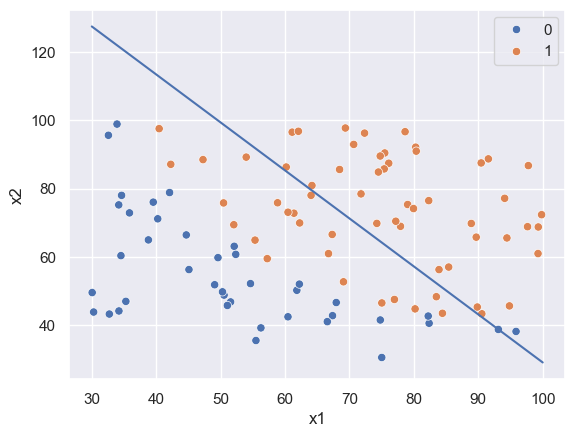

array([0.    , 0.    , 0.    , 0.9728, 1.    , 0.    , 1.    , 0.    ,
       1.    , 0.    , 0.9999, 0.    , 1.    , 1.    , 0.    , 0.    ,
       0.    , 0.    , 1.    , 0.    , 0.    , 1.    , 0.    , 0.    ,
       1.    , 0.    , 0.    , 0.4871, 0.    , 0.    , 0.    , 1.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.9848, 0.    , 0.    ,
       1.    , 0.    , 1.    , 0.    , 0.    , 0.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 0.9404, 0.    , 0.    , 0.    ,
       1.    , 0.    , 1.    , 1.    , 1.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.0101,
       1.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ,
       1.    , 1.    , 0.    , 0.    , 1.    , 1.    , 0.    , 1.    ,
       1.    , 0.    , 1.    , 1.    , 0.    , 1.    , 0.9962, 0.    ,
       0.    , 1.    , 0.    , 1.    ])

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
# scaler_ss = StandardScaler()
# result_ss = scaler_ss.fit_transform(data_rn)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

dataUrl = '.\\scatter.csv'
df = pd.read_csv(dataUrl)

# 绘制图片
sns.set()
sns.scatterplot(x="x1", y="x2", hue="y",data=df)

# 从df中获取数据
y = np.array(df)[:,2]
# 将y项变为偏置项
X = np.array(df.replace({0:1}))[:, [2,0,1]]
# 训练模型, 这比训练得开到这么大才能收敛啊~~~
num_iterations = 100000
learning_rate = 0.1
w = logistic_regression(X,y, num_iterations, learning_rate)

x_points = np.linspace(30,100, 70)
# w0 + w1*x1 + w2*x2 = 0 => x2 = (w0+w1*x2)/(-w2)
y_ = (w[0] + w[1] * x_points)/-w[2]
sns.lineplot(x=x_points, y = y_)
plt.show()

# 使用训练好的参数进行预测
def predict(X, theta):
    predictions = sigmoid(np.dot(X, theta))
    return predictions

np.round(predict(X, w), 4)

### 代码

#### 手动实现

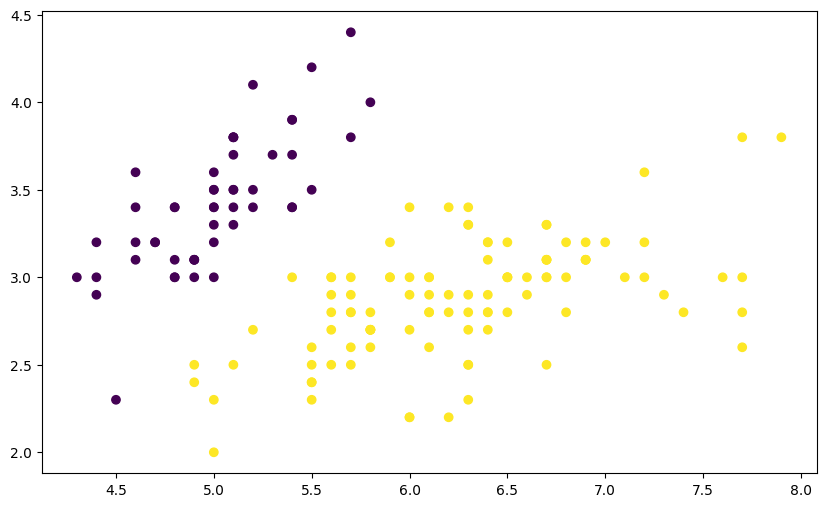

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("./course-8-data.csv", header=0,)  # 加载数据集
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

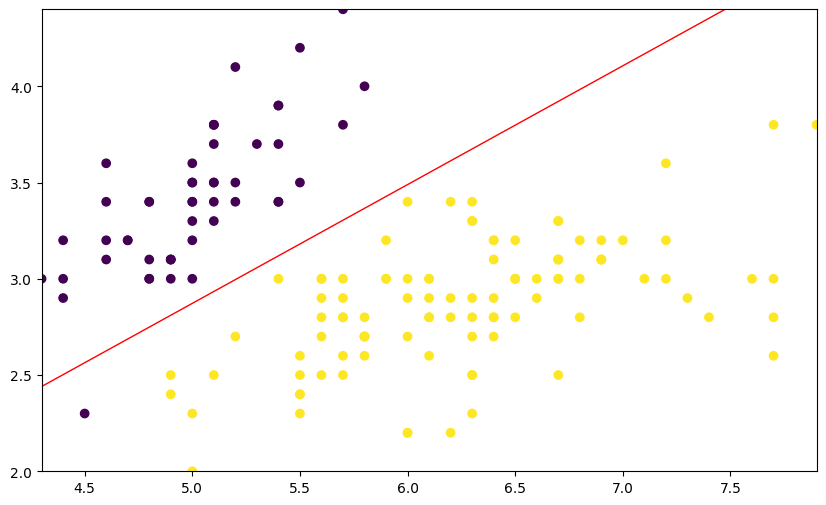

In [ ]:
def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)

plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (df["X0"].min(),df["X0"].max(),)
x2_min, x2_max = (df["X1"].min(),df["X1"].max(),)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

Text(0, 0.5, 'Loss function')

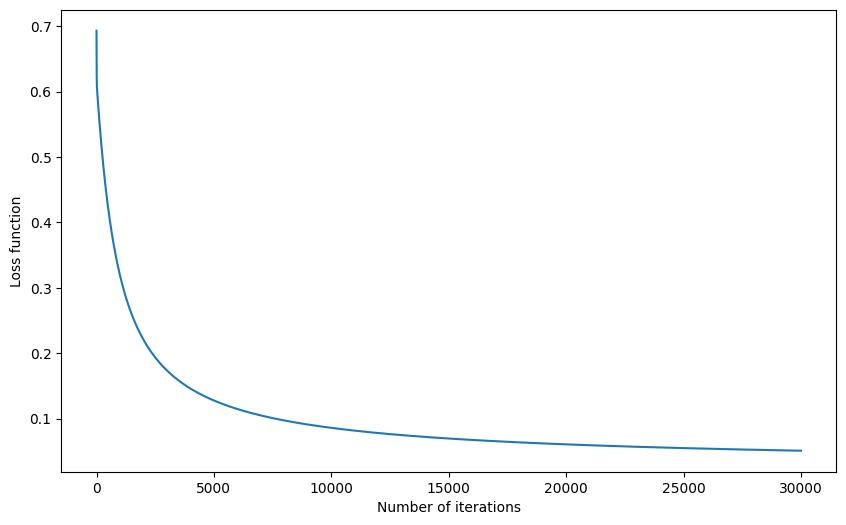

In [8]:
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

#### scikit 实现

[[ 2.49579289 -4.01011301]] [-0.81713932]
0.9933333333333333


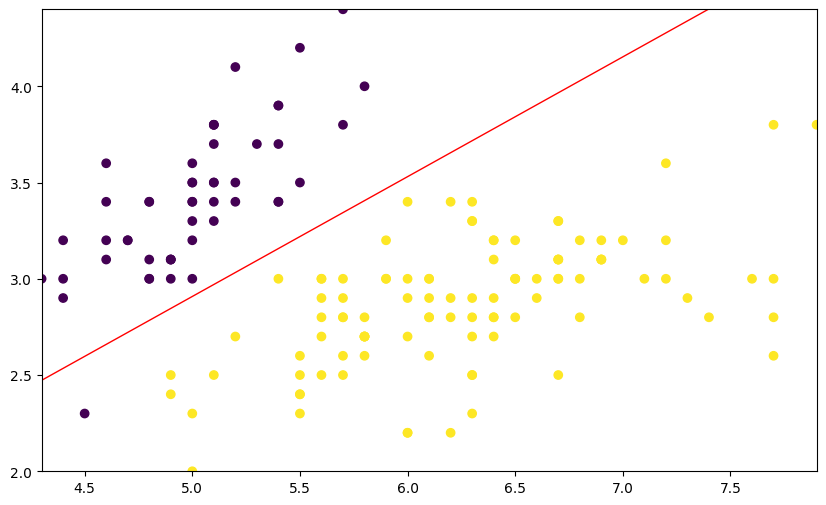

In [ ]:
from sklearn.linear_model import LogisticRegression

 # 设置数据解算精度和迭代次数
model = LogisticRegression(tol=0.001, max_iter=10000, solver="liblinear") 
model.fit(x, y)
print(model.coef_, model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

print(model.score(x, y))